In [2]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

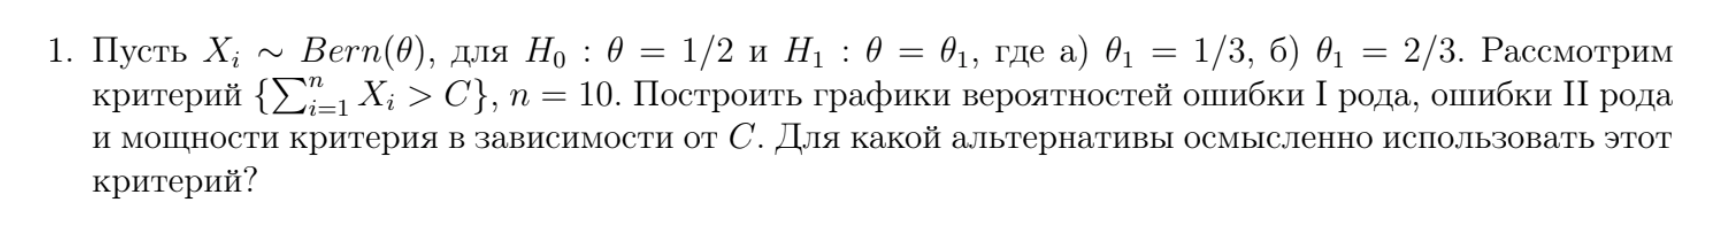

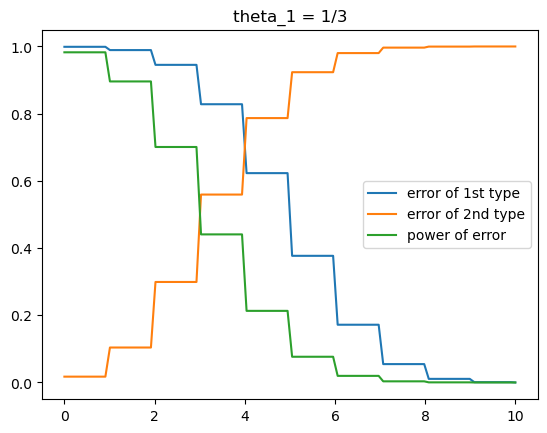

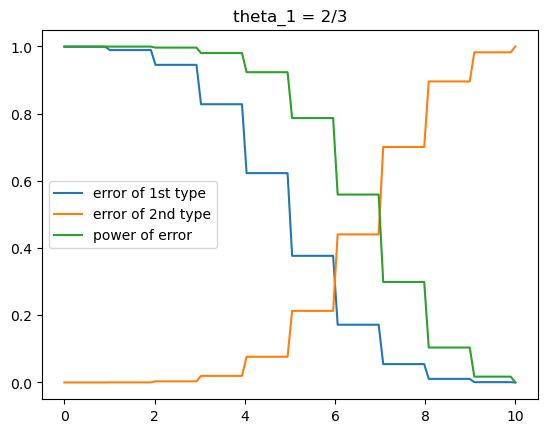

In [13]:
theta = 1/2
n = 10
def first(n:int, theta:float, c:float):
    res = 1 - sts.binom.cdf(c, n = n, p = theta)
    return res
def second(n:int, theta:float, c:float):
    res = sts.binom.cdf(c, n = n, p = theta)
    return res
def power(n:int, theta:float, c:float):
    res = 1 - sts.binom.cdf(c, n = n, p = theta)
    return res
X = sts.bernoulli.rvs(theta, size = n)
C = np.linspace(0,10,100)
fig,ax = plt.subplots()
plt.title("theta_1 = 1/3")
y_1 = [first(n,1/2,c) for c in C]
y_2 = [second(n,1/3,c) for c in C]
y_3 = [power(n,1/3,c) for c in C]
ax.plot(C, y_1, label="error of 1st type")
ax.plot(C, y_2, label="error of 2nd type")
ax.plot(C, y_3, label="power of error")
ax.legend()
###
fig1,ax1 = plt.subplots()
plt.title("theta_1 = 2/3")
y_1 = [first(n,1/2,c) for c in C]
y_2 = [second(n,2/3,c) for c in C]
y_3 = [power(n,2/3,c) for c in C]
ax1.plot(C, y_1, label="error of 1st type")
ax1.plot(C, y_2, label="error of 2nd type")
ax1.plot(C, y_3, label="power of error")
ax1.legend()

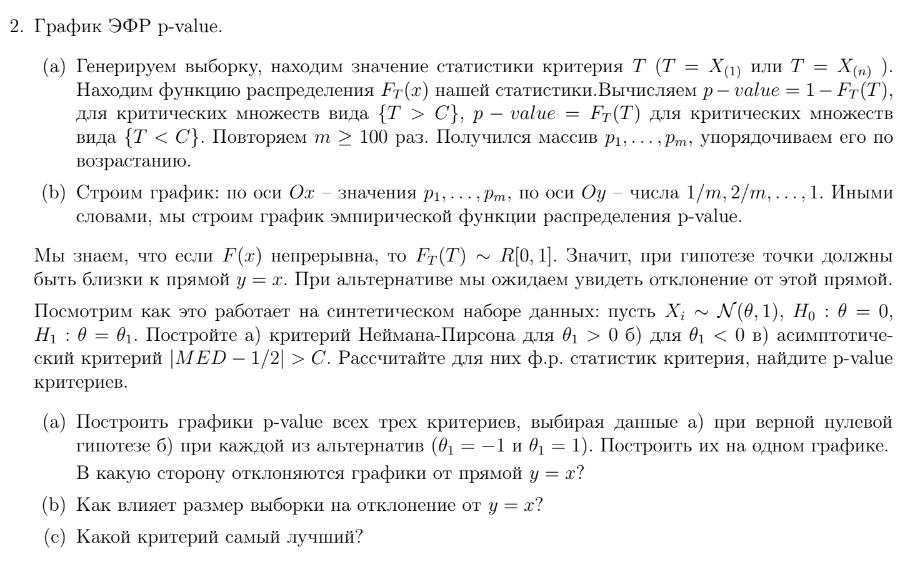

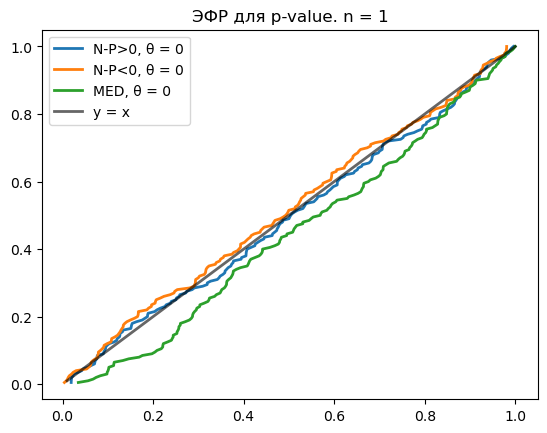

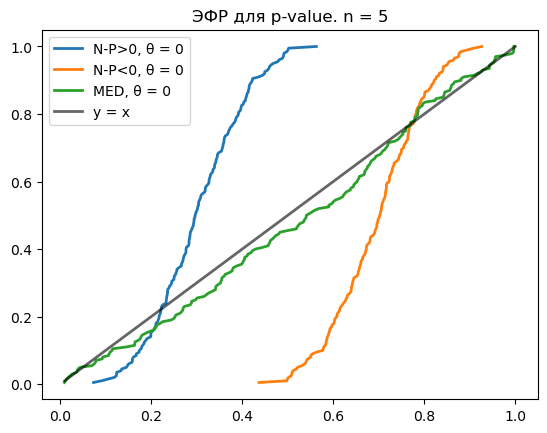

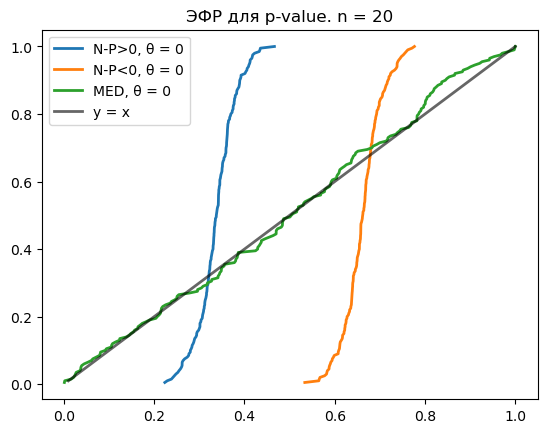

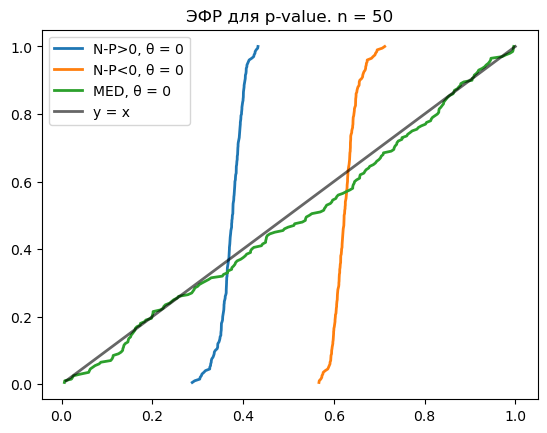

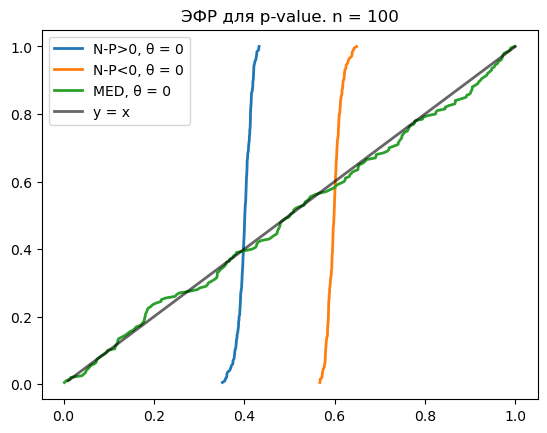

In [4]:
N = [1,5,20,50,100]

def p_val_a(c:float):
    res = 1 - (sts.norm.cdf(c, loc = 0, scale = np.sqrt(n)))
    return res
def p_val_b(c:float):
    res = (sts.norm.cdf(c, loc = 0, scale = np.sqrt(n)))
    return res
def p_val_med(c:float):
    x0 = sts.norm.ppf(0.5, loc = 0, scale =1)
    sigma = 1/(2 * sts.norm.pdf(x0, loc =0, scale =1))
    res = 2 - 2 *sts.norm.cdf(math.sqrt(n) * c, loc = 0, scale = sigma)
    return res
    
def task(n:int, theta:float):
    m = 200
    result1 = []
    result2 = []
    result3 = []
    for j in range (m):
        Sample = sts.norm.rvs(theta,1, size=n) # нормальные N(theta,1)
        sample_val = np.sum(Sample)
        med_val = np.absolute(np.median(Sample)) # MED

        result1 = np.append(result1, p_val_a(sample_val))
        result2 = np.append(result2, p_val_b(sample_val))
        result3 = np.append(result3, p_val_med(med_val))


    result1 = np.sort(result1)
    result2 = np.sort(result2)
    result3 = np.sort(result3)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"ЭФР для p-value. n = {n}")
    ax.plot(result1, y_vals, label = f"N-P>0, θ = {theta}", lw = 2)
    ax.plot(result2, y_vals, label = f"N-P<0, θ = {theta}", lw = 2)
    ax.plot(result3, y_vals, label = f"MED, θ = {theta}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

for n in N:
    fig,ax = plt.subplots()
    for theta in [0]: # в данный момент генерируется для верной гипотезы = 0. поменять на 1 или -1 для генерации альтернативы
        task(n,theta)
    ax.plot(y_vals, y_vals, label = "y = x", lw = 2, color = 'black', alpha = 0.6)
    ax.legend()

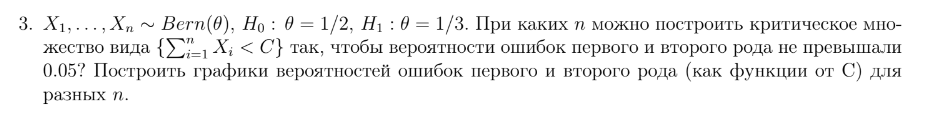

52
53


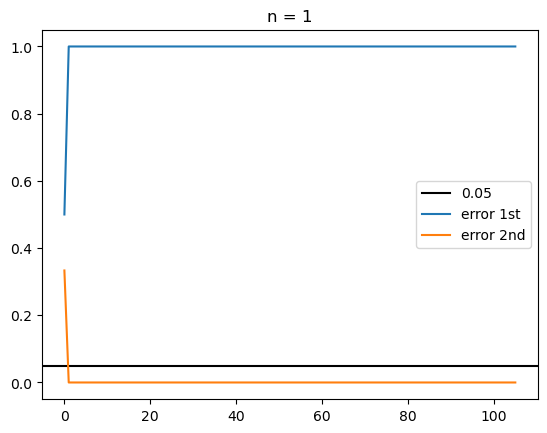

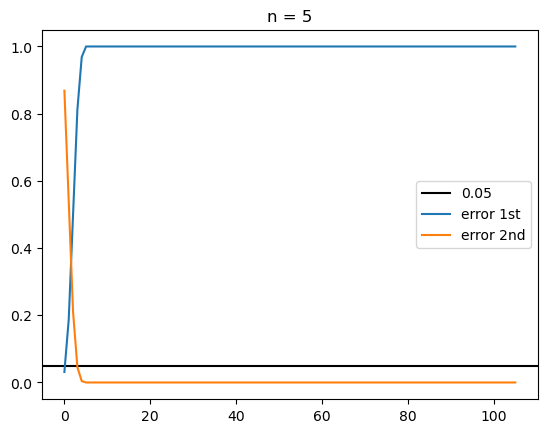

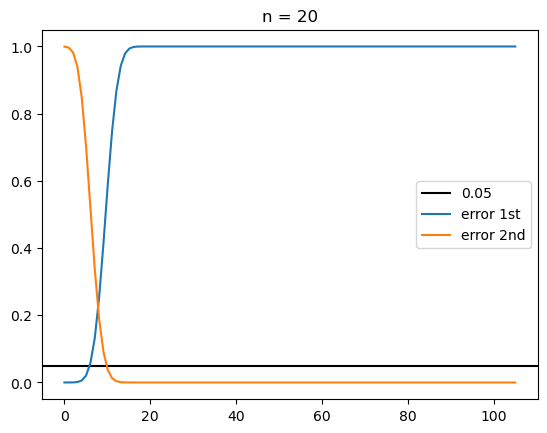

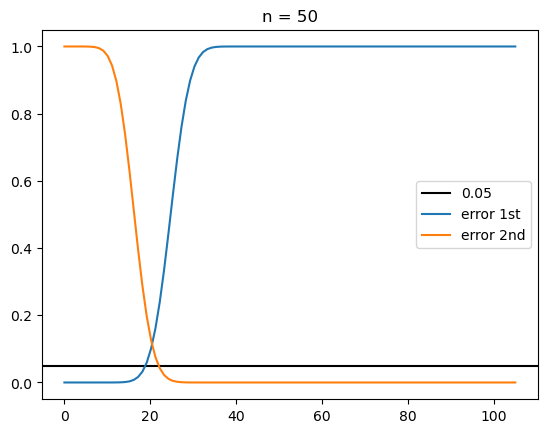

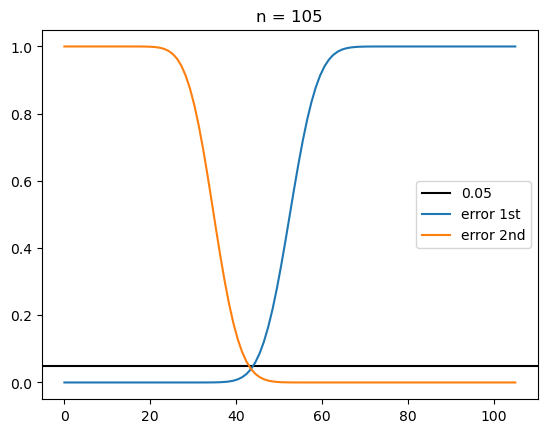

In [61]:
N = [1,5,20,50,105]
theta = 1/2
def first(n:int, theta:float, c:float):
    res = sts.binom.cdf(c, n = n, p = theta)
    return res
def second(n:int, theta:float, c:float):
    res = 1 - sts.binom.cdf(c, n = n, p = theta)
    return res
def task(n:int):
    X = sts.bernoulli.rvs(theta, size = n)
    C = np.linspace(0,105,105)
    
    fig,ax = plt.subplots()
    plt.title(f"n = {n}")
    y_1 = [first(n,1/2,c) for c in C]
    y_2 = [second(n,1/3,c) for c in C]
    ax.axhline(0.05, color='black', label="0.05")
    ax.plot(C, y_1, label="error 1st")
    ax.plot(C, y_2, label="error 2nd")
    ax.legend()

for n in N:
    task(n)
    
   
'''C = np.linspace(0,105,105)
def equal(a,b):
    for i in range(len(C)):
        if a[i] == b[i]:
            return int(i)

for n in range(105):
    X = sts.bernoulli.rvs(theta, size = n)
    y_1 = [first(n,1/2,c) for c in C]
    y_2 = [second(n,1/3,c) for c in C]
    m = set(y_1) & set(y_2)
    m = list(m)
    val = 0
    if m:
        if m[0] < 0.05:
            val = m[0]
        for i in range(len(y_1)):
            if y_1[i] == val:
                print(n)
                break'''